# 專五上 人工智慧 HW2
智動五 1092B0002 李善得

## HW2-1
請以mnist參考程式，撰寫Cross entropy數學公式，並訓練神經網路。

In [2]:
# 匯入所需的庫
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 加載數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 調整數據形狀和範圍
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 將標籤轉換為 one-hot 編碼
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# 自定義交叉熵損失函數
def custom_cross_entropy(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    return -tf.reduce_sum(y_true * tf.math.log(y_pred))

In [5]:
# 建立模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss=custom_cross_entropy, metrics=['accuracy'])

/Users/vincent/Projects/專五上/人工智慧/HW2/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 訓練模型
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8869 - loss: 11.1266 - val_accuracy: 0.9836 - val_loss: 1.7069
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9834 - loss: 1.6731 - val_accuracy: 0.9883 - val_loss: 1.2615
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9894 - loss: 1.0680 - val_accuracy: 0.9889 - val_loss: 1.0512
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9926 - loss: 0.7907 - val_accuracy: 0.9914 - val_loss: 0.9820
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9942 - loss: 0.6218 - val_accuracy: 0.9905 - val_loss: 1.0955


In [7]:
# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9878 - loss: 1.2933
Test accuracy: 0.9905


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


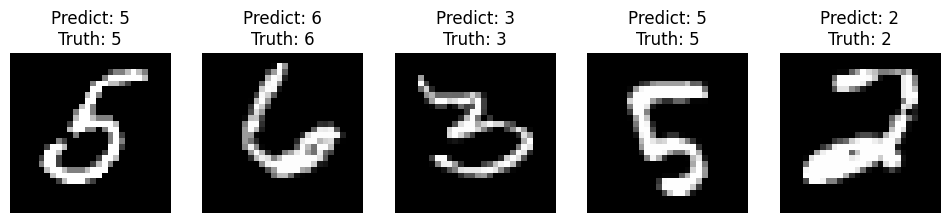

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 進行預測
predictions = model.predict(test_images)

# 隨機選取 5 個索引
random_indices = np.random.choice(test_images.shape[0], 5, replace=False)

# 繪製圖片和預測結果
plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predict: {np.argmax(predictions[index])}\nTruth: {np.argmax(test_labels[index])}')
    plt.axis('off')
plt.show()


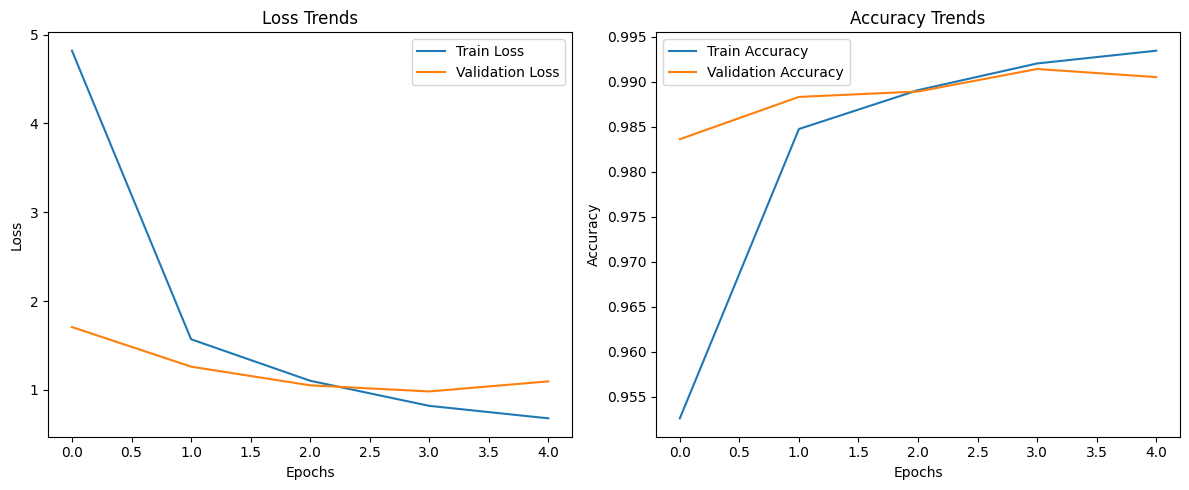

In [9]:
import matplotlib.pyplot as plt

# 繪製損失曲線
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 繪製準確率曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

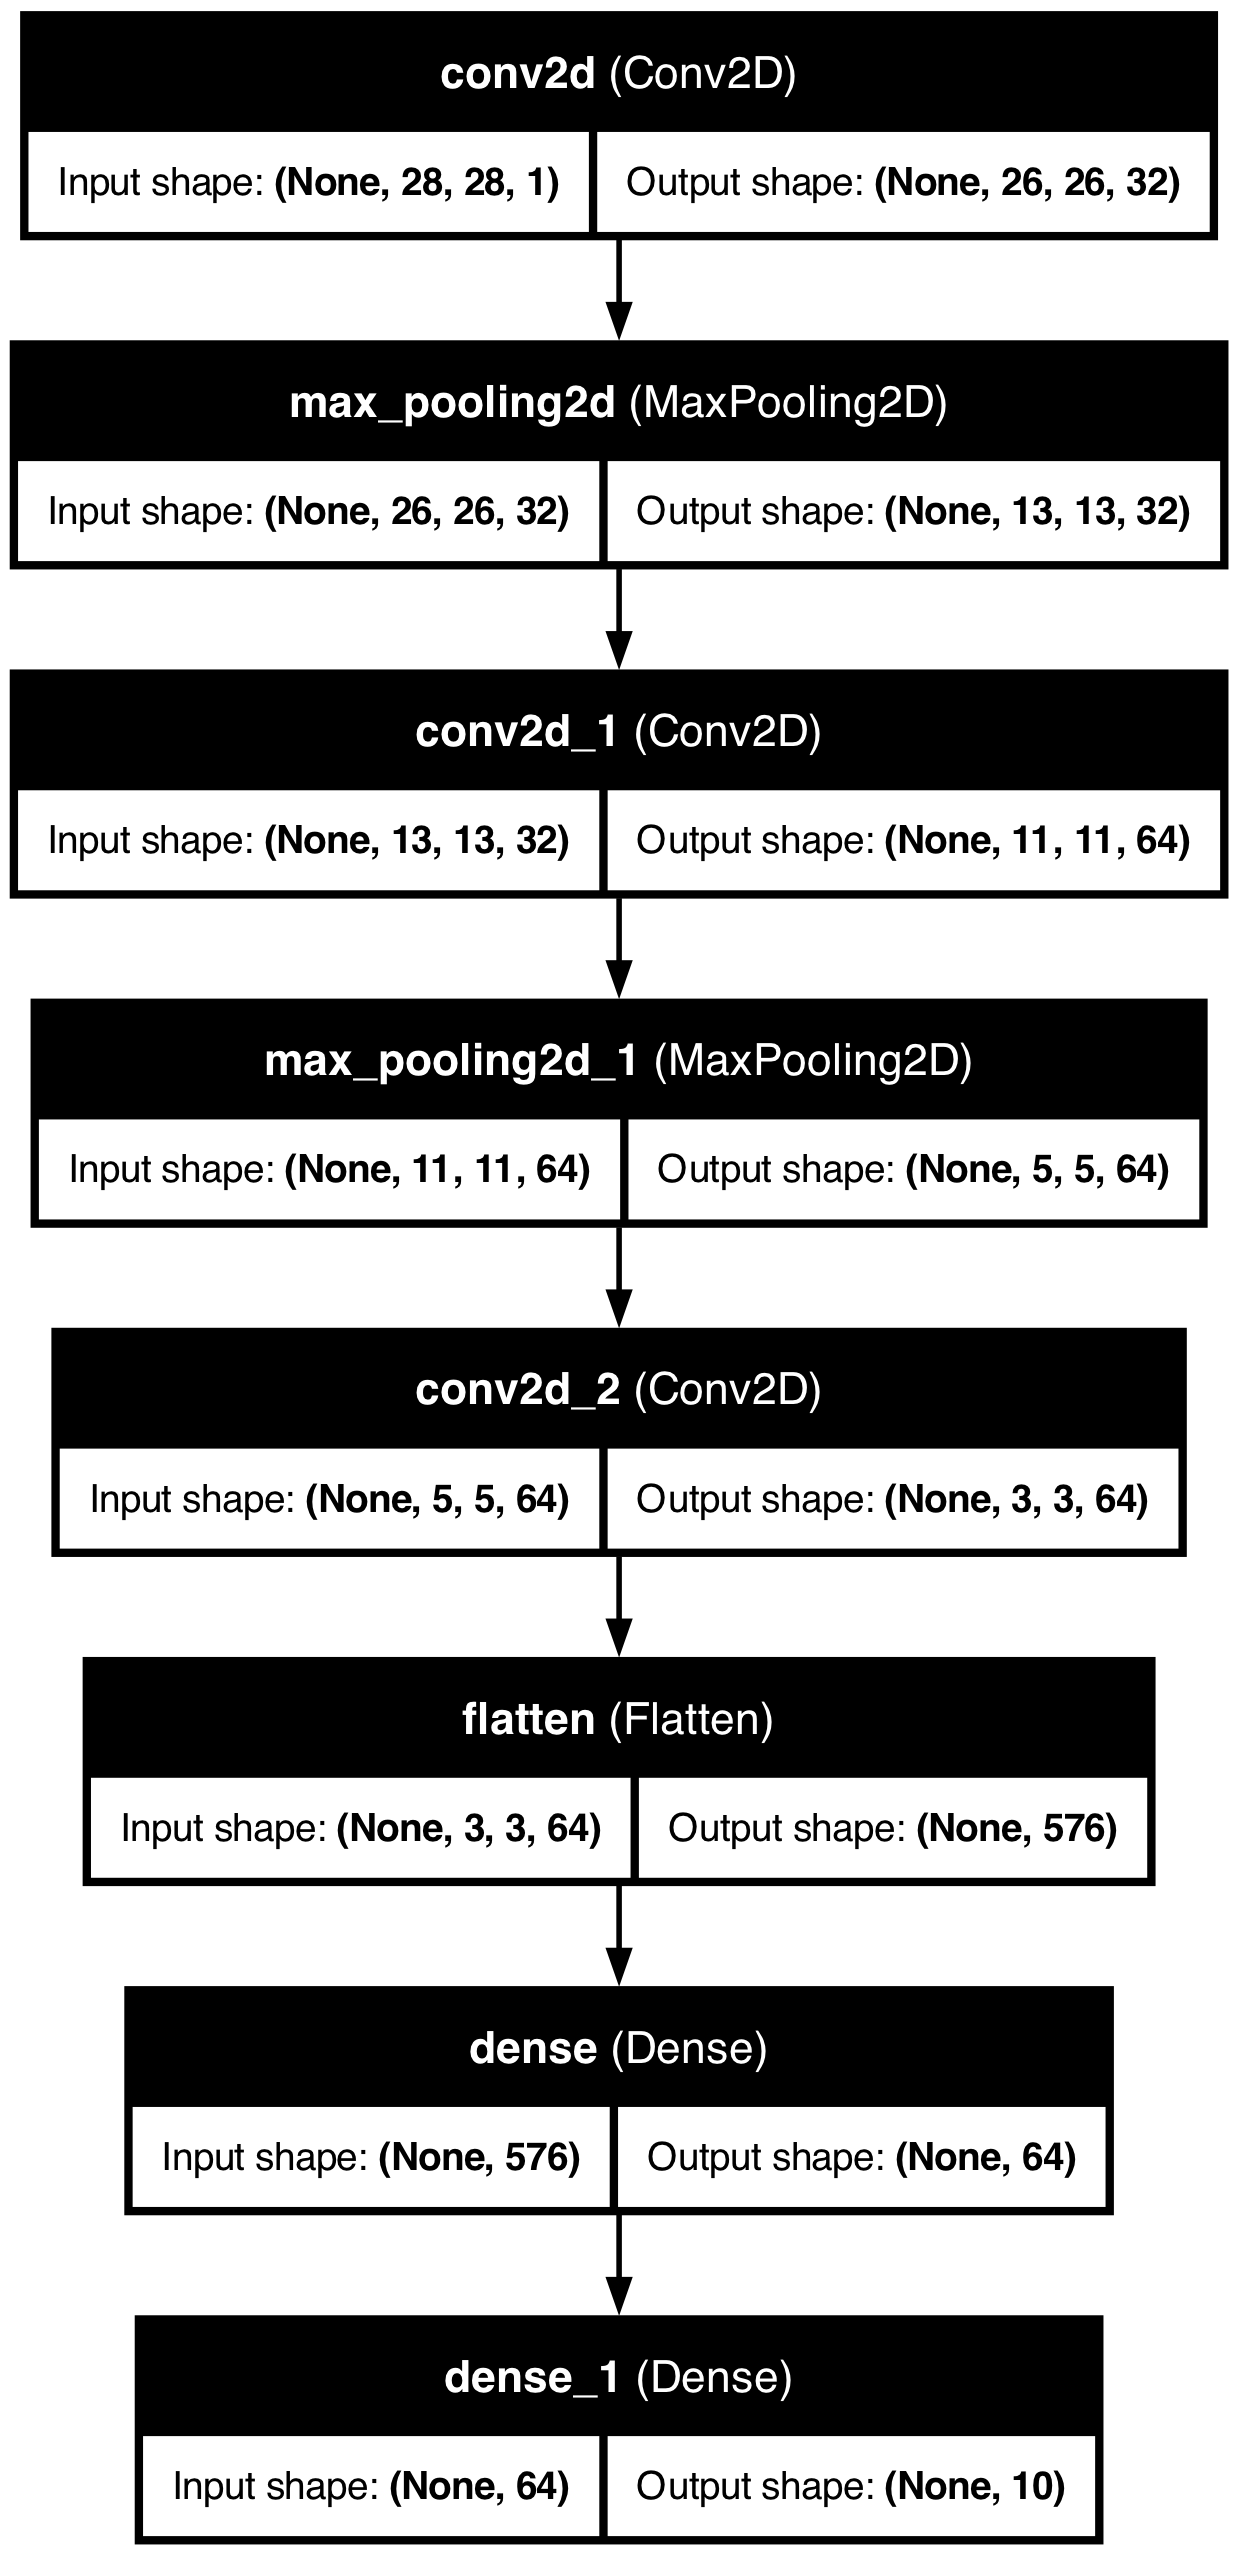

In [10]:
from tensorflow.keras.utils import plot_model

# 產生模型架構圖並保存
plot_model(model, to_file='./model_structure.png', show_shapes=True, show_layer_names=True)

# # 如果在 Jupyter Notebook 中使用，可以直接在 Notebook 中顯示圖片
# from IPython.display import Image
# Image(filename='model_structure.png')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


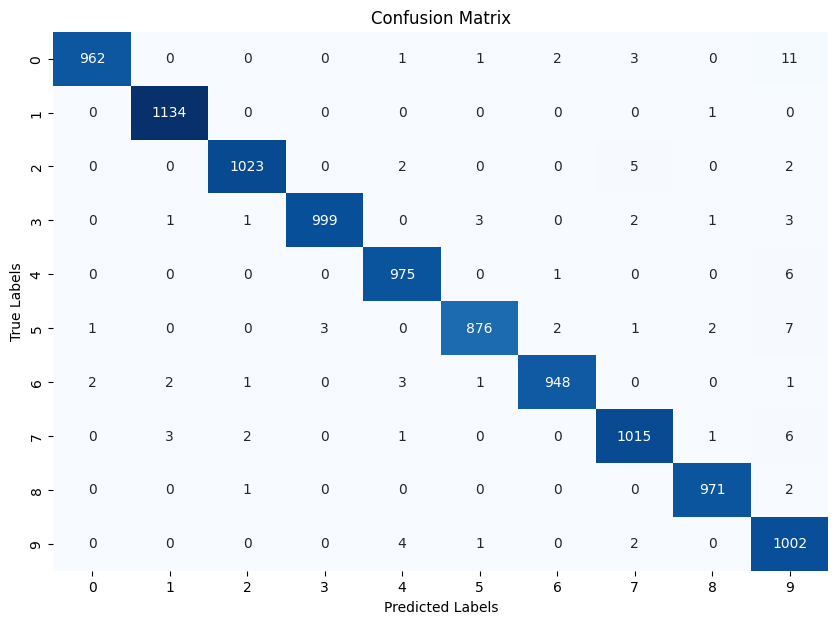

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 假設 test_images 是你的測試數據，model 是你的模型
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## HW2-2
請以mnist參考程式，撰寫Binary Cross entropy數學公式，並訓練神經網路。自行抽取兩個數字作為訓練資料 。

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [21]:
# 加載數據集並選擇特定數字
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_filter = np.where((train_labels == 0) | (train_labels == 9))
test_filter = np.where((test_labels == 0) | (test_labels == 9))
train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# 調整數據形狀和範圍
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255

# 將標籤轉換為二進制
train_labels = np.where(train_labels == 9, 1, 0)
test_labels = np.where(test_labels == 9, 1, 0)


In [22]:
def custom_binary_crossentropy(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    loss = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
    return tf.reduce_mean(loss)

In [23]:
# 建立模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [24]:
# 使用自定義損失函數編譯模型
model.compile(optimizer='adam', loss=custom_binary_crossentropy, metrics=['accuracy'])

# 訓練模型
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9746 - loss: 0.0852 - val_accuracy: 0.9960 - val_loss: 0.0126
Epoch 2/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9955 - val_loss: 0.0138
Epoch 3/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 4/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9975 - val_loss: 0.0069
Epoch 5/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9985 - val_loss: 0.0061
Epoch 6/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9999 - loss: 8.2383e-04 - val_accuracy: 0.9970 - val_loss: 0.0069
Epoch 7/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 4.2724e-04 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 8/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 3.0576e-04 - val

In [25]:
# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0048
Test accuracy: 0.9985


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


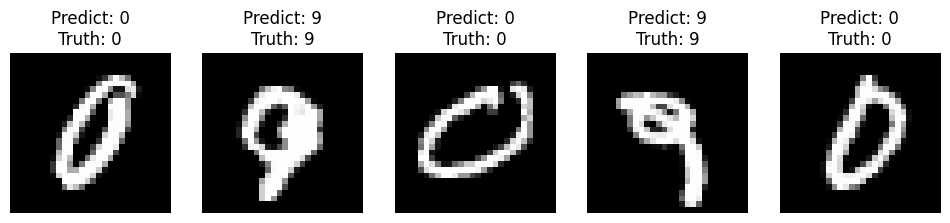

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 進行預測
predictions = model.predict(test_images)

# 隨機選取 5 個索引
random_indices = np.random.choice(test_images.shape[0], 5, replace=False)

# 繪製圖片和預測結果
plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    # 由於使用 sigmoid，我們將預測結果與 0.5 比較來判斷是否為 9
    predicted_label = '9' if predictions[index] > 0.5 else '0'
    true_label = '9' if test_labels[index] == 1 else '0'
    plt.title(f'Predict: {predicted_label}\nTruth: {true_label}')
    plt.axis('off')
plt.show()


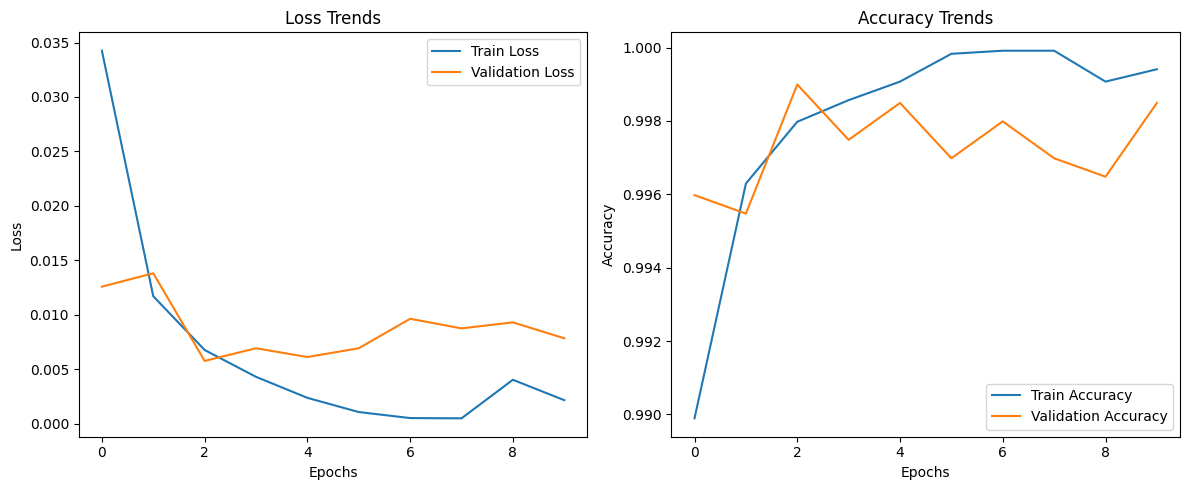

In [29]:
import matplotlib.pyplot as plt

# 繪製損失曲線
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 繪製準確率曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

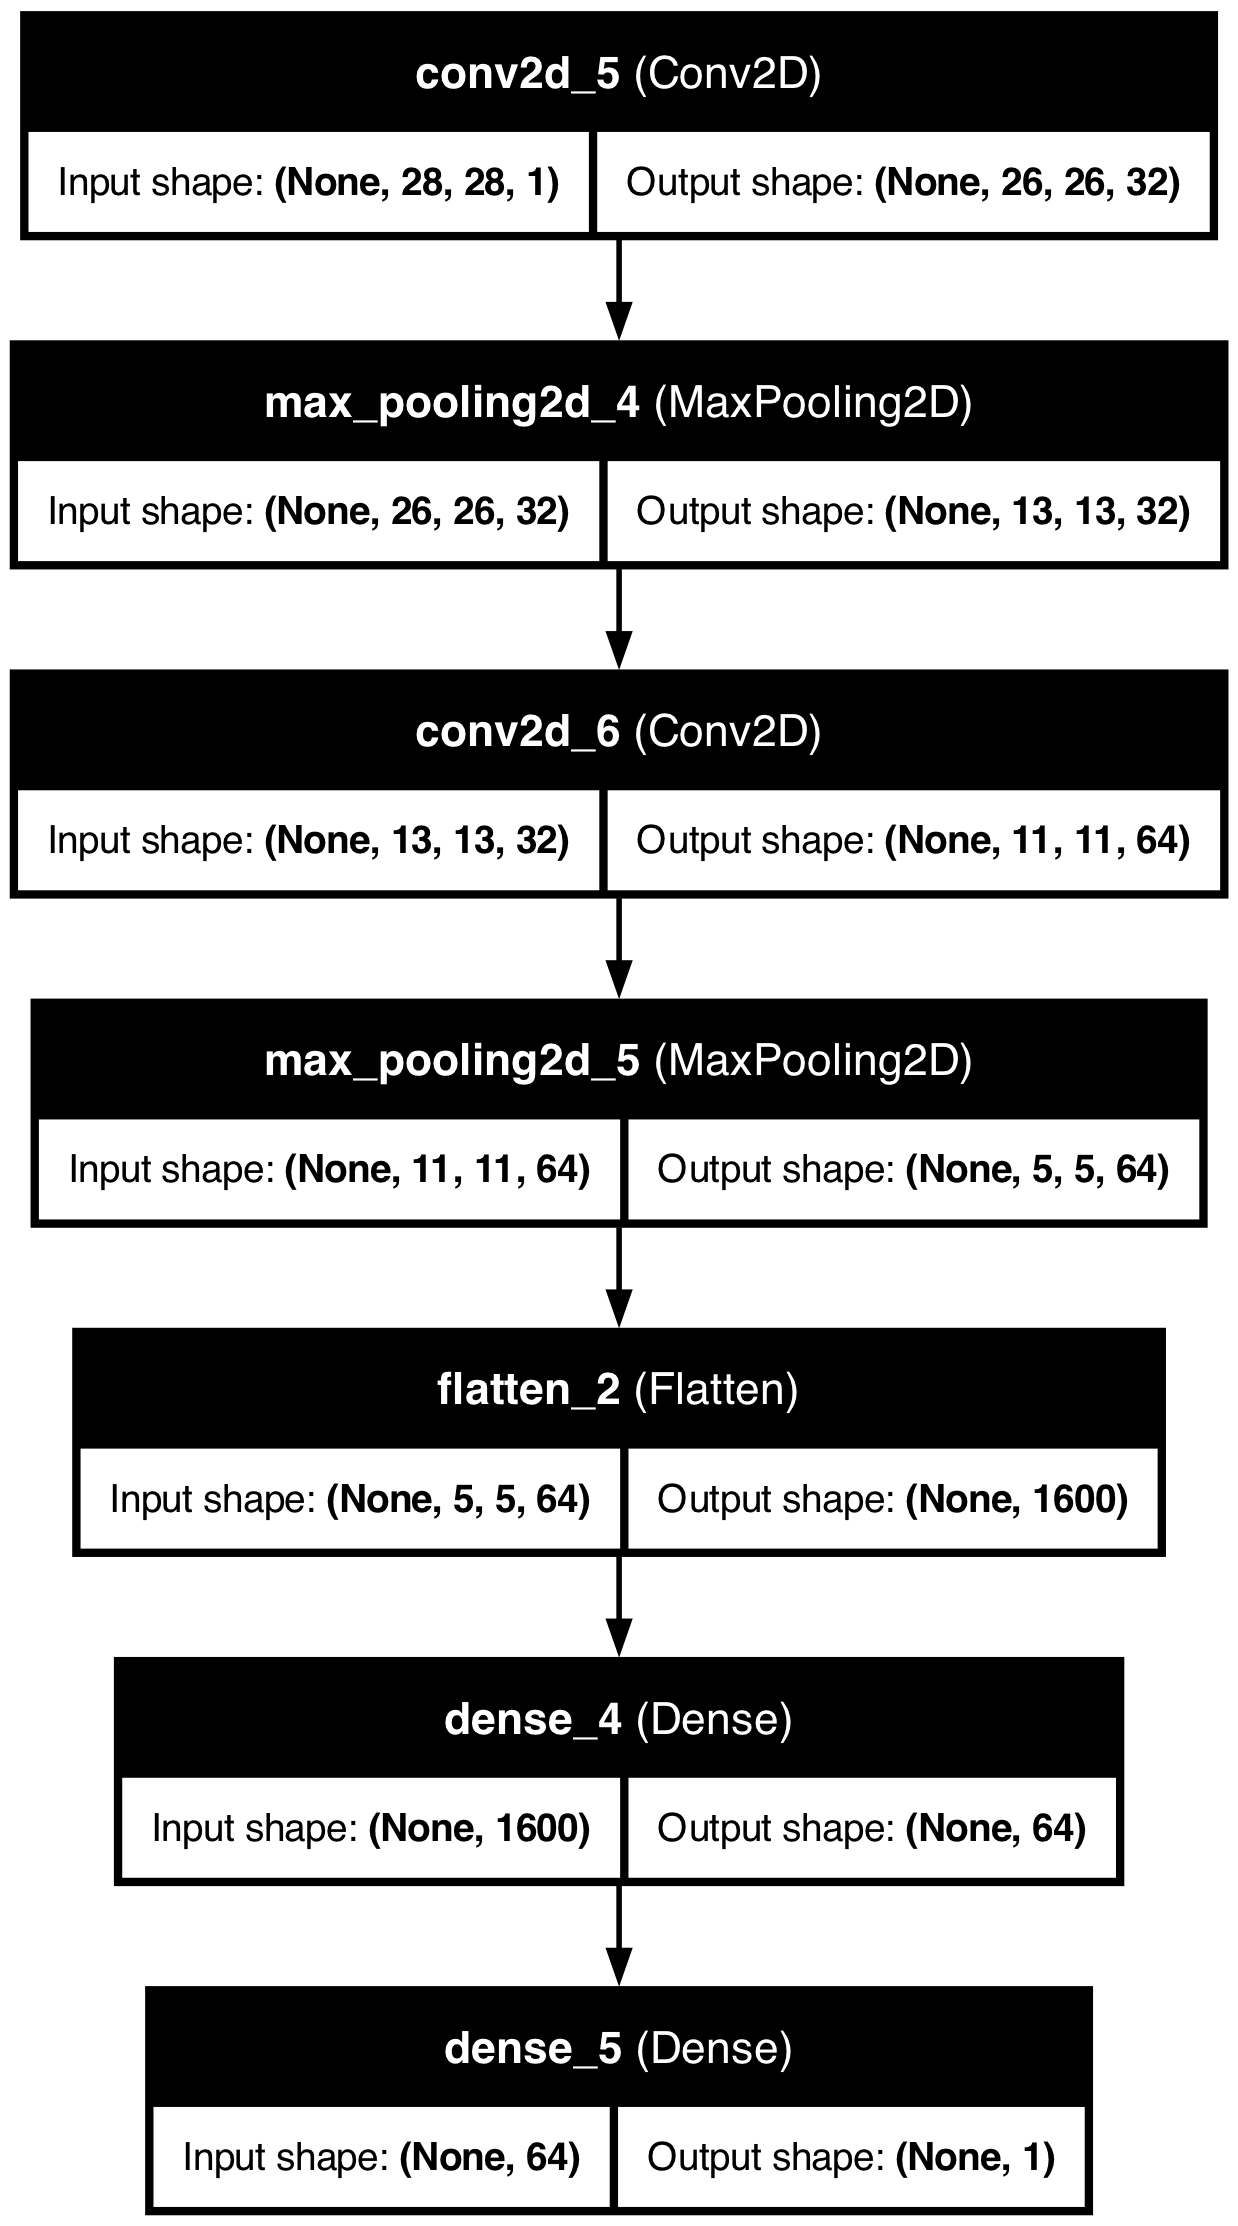

In [30]:
from tensorflow.keras.utils import plot_model

# 產生模型架構圖並保存
plot_model(model, to_file='./model_structure.png', show_shapes=True, show_layer_names=True)

# # 如果在 Jupyter Notebook 中使用，可以直接在 Notebook 中顯示圖片
# from IPython.display import Image
# Image(filename='model_structure.png')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


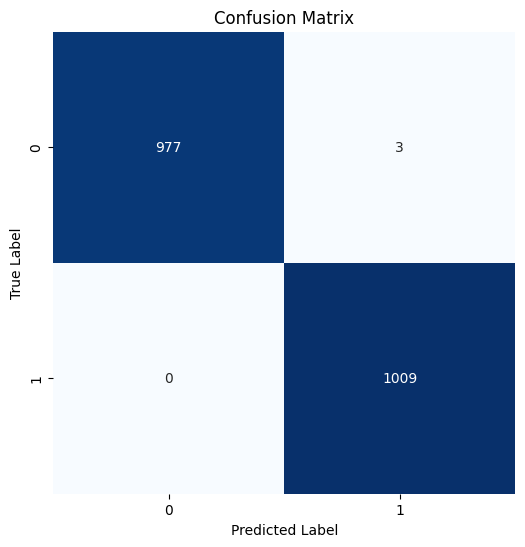

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 進行預測，並將預測概率轉換為類別標籤（使用 0.5 作為閾值）
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(test_labels, predicted_classes)

# 繪製混淆矩陣
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()